**Convolutional Neural Networks (CNN)**

**Importamos Tensorflow**

In [ ]:
!pip install -q tensorboardcolab

import tensorflow as tf
print("TensorFlow:", tf.__version__)

TensorFlow: 2.8.0


In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


**Comprobación de hardware**

**CPU**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

**RAM**

In [ ]:
!cat /proc/meminfo

MemTotal:       13302920 kB
MemFree:        10608920 kB
MemAvailable:   12386428 kB
Buffers:          109820 kB
Cached:          1817676 kB
SwapCached:            0 kB
Active:          1051348 kB
Inactive:        1404556 kB
Active(anon):     479216 kB
Inactive(anon):      472 kB
Active(file):     572132 kB
Inactive(file):  1404084 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               700 kB
Writeback:             0 kB
AnonPages:        528352 kB
Mapped:           228280 kB
Shmem:              1192 kB
KReclaimable:      85536 kB
Slab:             132364 kB
SReclaimable:      85536 kB
SUnreclaim:        46828 kB
KernelStack:        4976 kB
PageTables:         7284 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    2941900 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       44832 kB
VmallocChunk:          0 kB
Percpu:          

**GPU**

In [ ]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!nvidia-smi

Thu Apr 21 14:13:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pwd

'/content'

**CONEXIÓN A GOOGLE DRIVE**

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MBD/NoEstructurados/PRACTICA_IMAGEN/
# List project directory contents
!ls

Mounted at /content/drive
/content/drive/MyDrive/MBD/NoEstructurados/PRACTICA_IMAGEN
bow.1.ipynb		 DenseNet201-2epoch.json	resnet50-2epoch.h5
bow3.ipynb		 image_classifier.py		resnet50-2epoch.json
bow.ipynb		 InceptionResNetV2-2epoch.h5	resnet50-40epoch.h5
bow.py			 InceptionResNetV2-2epoch.json	resnet50-40epoch.json
cnn_colab.ipynb		 Local				resnet50-6epoch.h5
cnn.ipynb		 logs				resnet50-6epoch.json
cnn.py			 NASNetLarge-2epoch.h5		results.py
data			 NASNetLarge-2epoch.json	training_results.xlsx
dataDiv			 NASNetMobile-2epoch.h5		validation_results.xlsx
dataset.py		 NASNetMobile-2epoch.json	Xception-2epoch.h5
DenseNet169-2epoch.h5	 __pycache__			Xception-2epoch.json
DenseNet169-2epoch.json  resnet50-20epoch.h5
DenseNet201-2epoch.h5	 resnet50-20epoch.json


**IMPORTACIÓN DE PAQUETES**

In [9]:
from importlib import reload

import cnn
from cnn import CNN
import glob 
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from torchvision import datasets, transforms

reload(cnn)

<module 'cnn' from '/content/drive/MyDrive/MBD/NoEstructurados/PRACTICA_IMAGEN/cnn.py'>

In [ ]:
!pip install split-folders 

Comprobación del directorio donde nos situamos.

In [ ]:
pwd

'/content/drive/.shortcut-targets-by-id/1uld1fqOBlu_PqDssb37GkVA7LjOCPCvv/PRACTICA_IMAGEN'

Este codigo ha sido necesario para separar nuestro set de datos en train y validation. En caso de que querer realizar un test es necesario añadir un tercer porcentaje. 
Se ha considerado oportuno dividir los datos en un 80% para train y un 20% para validation debido al número de datos encontrados.
Este codigo solo hay que ejecutarlo una sola vez, ya que sino generaría carpetas de imagenes que ya tenemos.


In [ ]:
# splitfolders.ratio('/content/drive/MyDrive/MBD/NoEstructurados/PRACTICA_IMAGEN/data/Mushrooms/', output="/content/drive/MyDrive/MBD/NoEstructurados/PRACTICA_IMAGEN/dataDivided", seed=1337, ratio=(0.8, 0.2))

**EDA**

En primer lugar, se ha hecho un análisis exploratorio de los datos. El objetivo de la práctica es clasificar diferentes especies de setas. Se puede observar que hay 9 especies diferentes de setas.

In [6]:
image_dir = 'data/Mushrooms'
g_type_list = [x.split('/')[-1] for x in glob.glob(os.path.join(image_dir, '[A-Z]*'))]
print(g_type_list)
num_classes = len(g_type_list)

['Entoloma', 'Lactarius', 'Cortinarius', 'Amanita', 'Russula', 'Suillus', 'Agaricus', 'Hygrocybe', 'Boletus']


Se han extraído 3 imágenes aleatorias de cada clase de setas

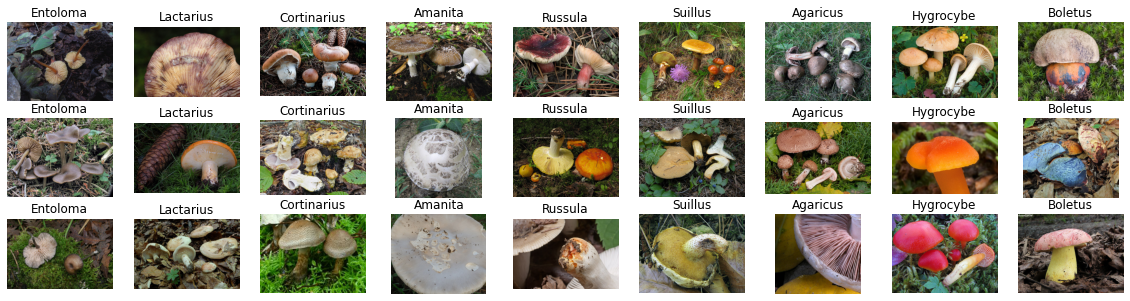

In [7]:
num_per_genus = 3
random_images = []
random_images_labels = []

for g in g_type_list:
    g_img_list = glob.glob(os.path.join(image_dir, g+'/*jpg'))
    num_img = len(g_img_list)
    rand_img_ind = np.random.choice(np.arange(0, num_img), size=num_per_genus, replace=False)
    random_images += [g_img_list[i] for i in rand_img_ind]
    random_images_labels += [g]*num_per_genus

f, ax = plt.subplots(num_per_genus, num_classes, figsize=(20,5))
for i, sample in enumerate(random_images):
    ax[i%num_per_genus, i//num_per_genus].imshow(plt.imread(sample))
    ax[i%num_per_genus, i//num_per_genus].axis('off')
    ax[i%num_per_genus, i//num_per_genus].set_title(random_images_labels[i])

plt.show()

In [10]:
def plot_distribution(dataset: datasets, dataset_type: str) -> None:
    
    mushroom_names = {
    0: "Agaricus",
    1: "Amanita",
    2: "Boletus",
    3: "Cortinarius",
    4: "Entoloma", 
    5: "Hygrocybe", 
    6: "Lactarius",
    7: "Russula",
    8: "Suillus"
}
    plot_order = ["Agaricus", "Amanita", "Boletus", "Cortinarius", "Entoloma", "Hygrocybe",
                 "Lactarius", "Russula", "Suillus"]
    
    label_list = []
    for i in range(0, len(dataset)):
        label_list.append(mushroom_names[dataset[i][1]])
        s = sns.countplot(label_list, order=plot_order)
        plt.ylim(0,1700) if dataset_type in ["Train dataset"] else plt.ylim(0, 400)
        _ = plt.xticks(s.get_xticks(), rotation=60, ha='right')
        s.set_title(dataset_type)
    
    return s
    

def autolabel(bar_plot):
    """
    Attach a text label above each bar displaying its height
    """
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

In [12]:
dataset = datasets.ImageFolder(image_dir, transform=None)

Distribución de las imágenes en las diferentes clases para los conjuntos de entrenamiento y validación

In [13]:
train_set = datasets.ImageFolder('dataDiv/train', transform=None)
ax = plot_distribution(train_set, 'Train dataset')
autolabel(ax)

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f3883ec1e60> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
val_set = datasets.ImageFolder('dataDiv/val', transform=None)
ax = plot_distribution(val_set, 'Validation dataset')
autolabel(ax)

**VARIABLES GLOBALES**

En la siguiente celda se realizan dos operaciones, por un lado se cargan los datos de train y validation y por el otro se le asigna a la variable cnn que es de la clase CNN(), la cual ha sido importada previamente.

In [ ]:
training_dir = '/content/drive/MyDrive/MBD/NoEstructurados/PRACTICA_IMAGEN/dataDiv/train'
validation_dir = '/content/drive/MyDrive/MBD/NoEstructurados/PRACTICA_IMAGEN/dataDiv/val'
cnn = CNN()

**INVESTIGACIÓN DE MODELOS PREENTRENADOS** 

En primer lugar, vamos a utilizar diferentes tipos de modelos preentrenados de redes convolucionales con un número de epochs bajo, con el fin de poder averiguar cual de las redes preentrenadas se adapta mejor a nuestra base de datos para diferenciar de la mejor forma posible las diferentes categorias.  
Se ha realizado estas pruebas con un número bajo de epochs debido al coste computacional de ejecuión. Una vez seleccionada la red optima, se ejecutara con un número de epochs mas elevado, con el fin de obtener el modelo final.




  


    
    

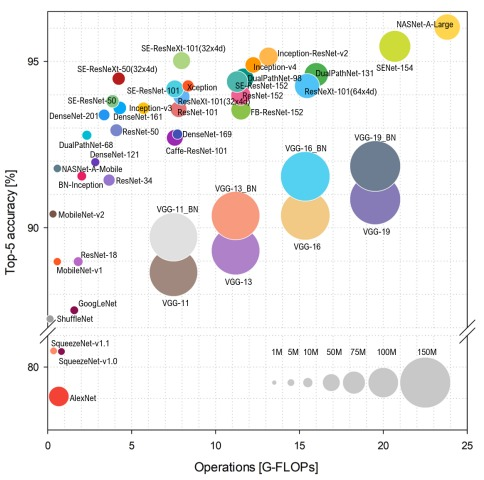

La selección de los modelos preentrenados como candidatos para desarrollar el modelo final se ha basado en el gráfico anterior. Tratando de seleccionar modelos en la parte superior, lo que significa que por normal general obtienen buen accuracy con diferentes bases de datos. Sin embargo tambien se ha tenido la complejidad del modelo, descartando aquellos modelos que requieren un número muy elevado de operaciones,por otro lado el diametro del circulo que representa el modelo indica el número de parametros a ajustar, por ello es preferible que su diametro sea bajo.


Xception-2epoch


In [ ]:
cnn.train(training_dir, validation_dir, base_model='Xception', epochs=2)
cnn.save('Xception-2epoch')

KeyboardInterrupt: ignored

NASNetLarge-2epoch

343621632/343610240 [==============================] - 2s 0us/step


Reading training and validation data...
Found 5367 images belonging to 9 classes.
Found 1310 images belonging to 9 classes.


Model summary
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 4032)              84916818  
                                                                 
 dense_6 (Dense)             (None, 1024)              4129792   
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 9)                 9225      
                                                                 
Total params: 89,055,835
Trainable params: 4,139,017
Non-trainable params: 84,916,818
_______________________

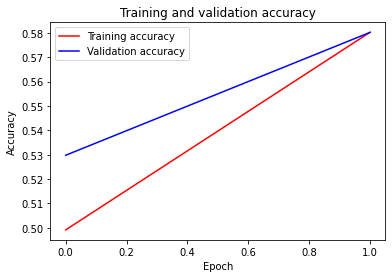

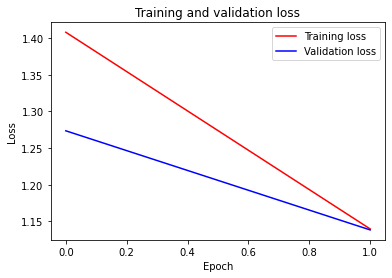

In [ ]:
cnn.train(training_dir, validation_dir, base_model='NASNetLarge', epochs=2)
cnn.save('NASNetLarge-2epoch')

NASNetMobile-2epoch

20004864/19993432 [==============================] - 0s 0us/step


Reading training and validation data...
Found 5367 images belonging to 9 classes.
Found 1310 images belonging to 9 classes.


Model summary
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 1056)              4269716   
                                                                 
 dense_8 (Dense)             (None, 1024)              1082368   
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 9)                 9225      
                                                                 
Total params: 5,361,309
Trainable params: 1,091,593
Non-trainable params: 4,269,716
___________________________

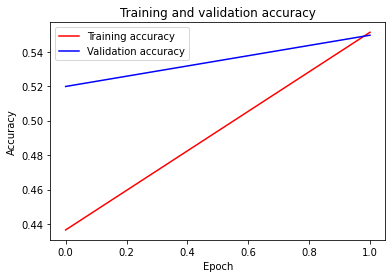

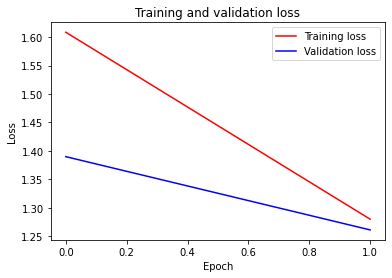

In [ ]:
cnn.train(training_dir, validation_dir, base_model='NASNetMobile', epochs=2)
cnn.save('NASNetMobile-2epoch')

DenseNet201-2epoch

74850304/74836368 [==============================] - 0s 0us/step


Reading training and validation data...
Found 5367 images belonging to 9 classes.
Found 1310 images belonging to 9 classes.


Model summary
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 dense_10 (Dense)            (None, 1024)              1967104   
                                                                 
 dropout_5 (Dropout)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 9)                 9225      
                                                                 
Total params: 20,298,313
Trainable params: 1,976,329
Non-trainable params: 18,321,984
_________________________

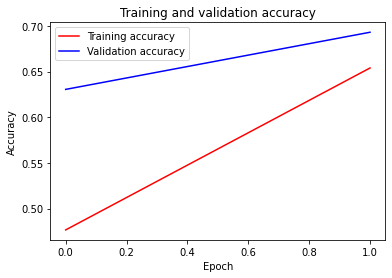

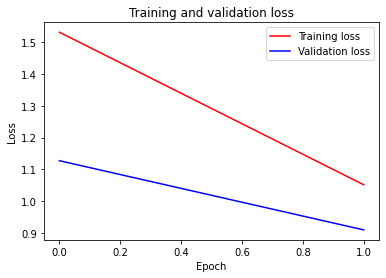

In [ ]:
cnn.train(training_dir, validation_dir, base_model='DenseNet201', epochs=2)
cnn.save('DenseNet201-2epoch')

DenseNet169-2epoch

51888128/51877672 [==============================] - 0s 0us/step


Reading training and validation data...
Found 5367 images belonging to 9 classes.
Found 1310 images belonging to 9 classes.


Model summary
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 1664)              12642880  
                                                                 
 dense_12 (Dense)            (None, 1024)              1704960   
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 9)                 9225      
                                                                 
Total params: 14,357,065
Trainable params: 1,714,185
Non-trainable params: 12,642,880
_________________________

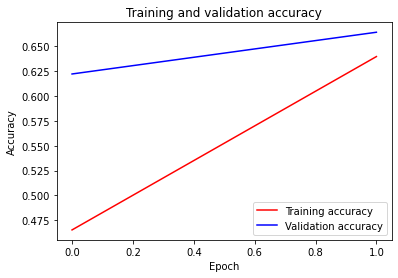

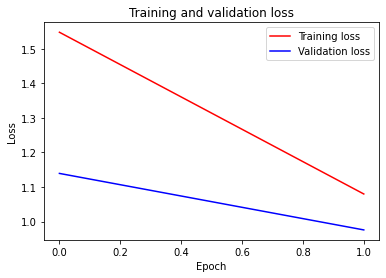

In [ ]:
cnn.train(training_dir, validation_dir, base_model='DenseNet169', epochs=2)
cnn.save('DenseNet169-2epoch')

InceptionResNetV2-2epoch

219070464/219055592 [==============================] - 1s 0us/step


Reading training and validation data...
Found 5367 images belonging to 9 classes.
Found 1310 images belonging to 9 classes.


Model summary
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 dense_14 (Dense)            (None, 1024)              1573888   
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_15 (Dense)            (None, 9)                 9225      
                                                                 
Total params: 55,919,849
Trainable params: 

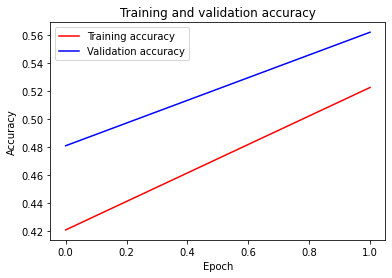

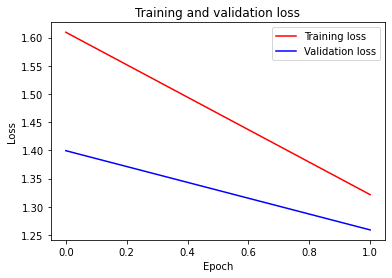

In [ ]:
cnn.train(training_dir, validation_dir, base_model='InceptionResNetV2', epochs=2)
cnn.save('InceptionResNetV2-2epoch')

resnet50-2epoch



Reading training and validation data...
Found 5367 images belonging to 9 classes.
Found 1310 images belonging to 9 classes.


Model summary
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_4 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 9)                 9225      
                                                                 
Total params: 25,695,113
Trainable params: 2,107,401
Non-trainable params: 23,587,712
_________________________________________________________________


Training CNN...
Epoch 

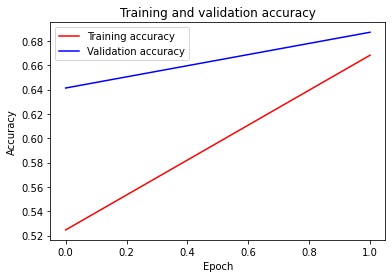

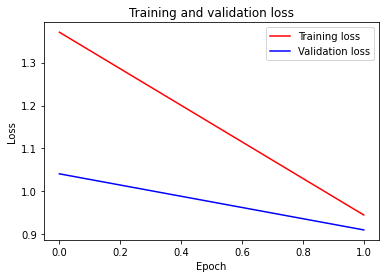

In [ ]:
cnn.train(training_dir, validation_dir, base_model='ResNet50', epochs=2)
cnn.save('resnet50-2epoch')

**AJUSTE DE NUMERO DE EPOCHS**

Finalmente, se puede apreciar como el modelo ResNet50 preentrenado con un número bajo de epochs es el que mejores resultados ha obtenido. Ademas las lineas que representan el accuracy tanto en train como en validation no han  llegado a juntarse ni han empezado a separarse. Por ello se ha considerado oportuno aumentar el número de epochs para este modelo preentrenado, con el fin de obtener el número ideal de epochs a seleccionar para el modelo final. En realidad lo ideal sería early stoping, sin embargo no se dispone del tiempo necesario para incorporarlo al modelo.



Reading training and validation data...
Found 5367 images belonging to 9 classes.
Found 1310 images belonging to 9 classes.


Model summary
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 9)                 9225      
                                                                 
Total params: 25,695,113
Trainable params: 2,107,401
Non-trainable params: 23,587,712
_________________________________________________________________


Training CNN...
Epoch 

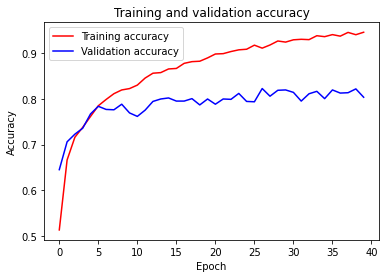

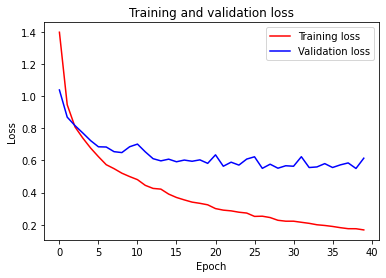

In [ ]:
cnn.train(training_dir, validation_dir, base_model='ResNet50', epochs=40)
cnn.save('resnet50-40epoch')

**MODELO FINAL**

El número de epochs a seleccionar sería al rededor de 20, ya que a partir de este punto empiezan a separarse las curvas, tambien empieza a estabilizarse el valor de accuracy en validation y el valor de loss tambien se estabiliza , lo que significa que se empieza a sobreentrenar el modelo.  
Del intervalo 1-20 epochs a elegir, el que mejor resultados ha dado en validation es 20 epochs.  
Por estos dos motivos se ha seleccionado para el modelo final un número de 20 epochs.



Reading training and validation data...
Found 5367 images belonging to 9 classes.
Found 1310 images belonging to 9 classes.


Model summary
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_6 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 9)                 9225      
                                                                 
Total params: 25,695,113
Trainable params: 2,107,401
Non-trainable params: 23,587,712
_________________________________________________________________


Training CNN...
Epoch 

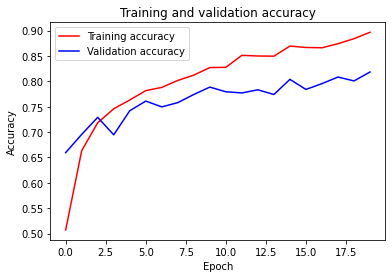

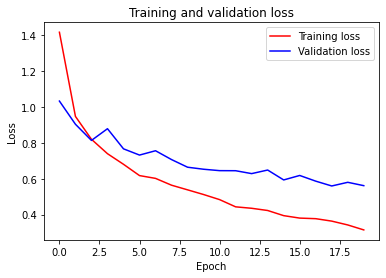

In [ ]:
cnn.train(training_dir, validation_dir, base_model='ResNet50', epochs=20)
cnn.save('resnet50-20epoch')

**CARGA DEL MODELO SELECCIONADO**


In [ ]:
cnn.load('resnet50-20epoch')

**MATRIZ DE CONFUSIÓN PARA EL SET DE ENTRENAMIENTO**

Se puede observar que las clase para las que se comete más error a la hora de clasificar son: Lactarius con Cortinarius, y Russula con Lactarius, entre otras. El error se produce en ambos sentidos, por tanto, para estas especies hay que tener especial atención. A continuación, se muestran imágenes comparadas de ambas clases para entender el problema.

In [ ]:
cnn.predict(training_dir, "Training")

Reading test data...
Found 5367 images belonging to 9 classes.


CLASSIFICATION RESULTS (TRAINING)

Confusion matrix

KNOWN/PREDICTED  Agaricus  Amanita  Boletus  Cortinarius  Entoloma  Hygrocybe  Lactarius  Russula  Suillus
Agaricus            245.0     10.0      4.0          4.0       1.0        0.0       11.0      7.0      0.0
Amanita               2.0    570.0      2.0          5.0       1.0        0.0        6.0     14.0      0.0
Boletus               0.0      7.0    841.0          3.0       0.0        0.0        1.0      4.0      2.0
Cortinarius           1.0      9.0      7.0        581.0       2.0        0.0       35.0     28.0      5.0
Entoloma              3.0     11.0      1.0          6.0     254.0        2.0        9.0      5.0      0.0
Hygrocybe             0.0      1.0      0.0          2.0       2.0      240.0        3.0      3.0      1.0
Lactarius             3.0      8.0      6.0         20.0       4.0        1.0     1160.0     42.0      6.0
Russula               2.0 

*CORTINARIUS*

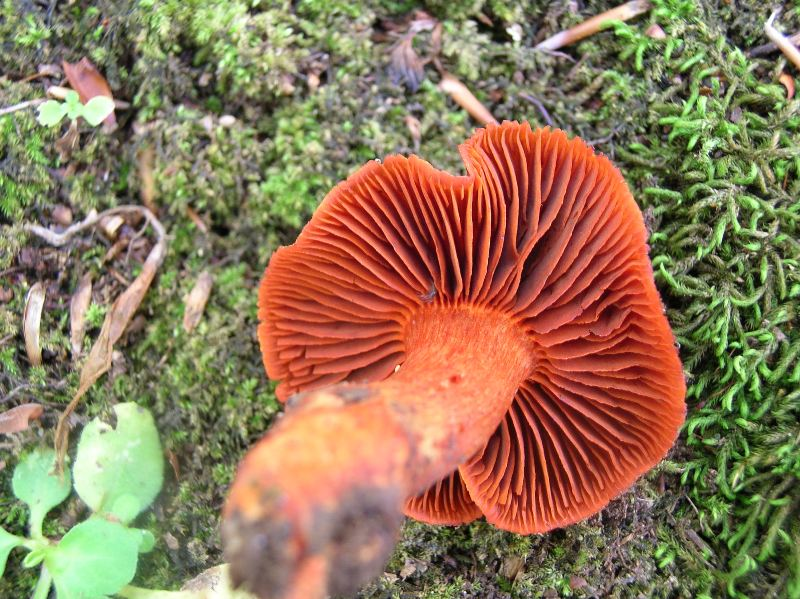

*LACTARIUS*

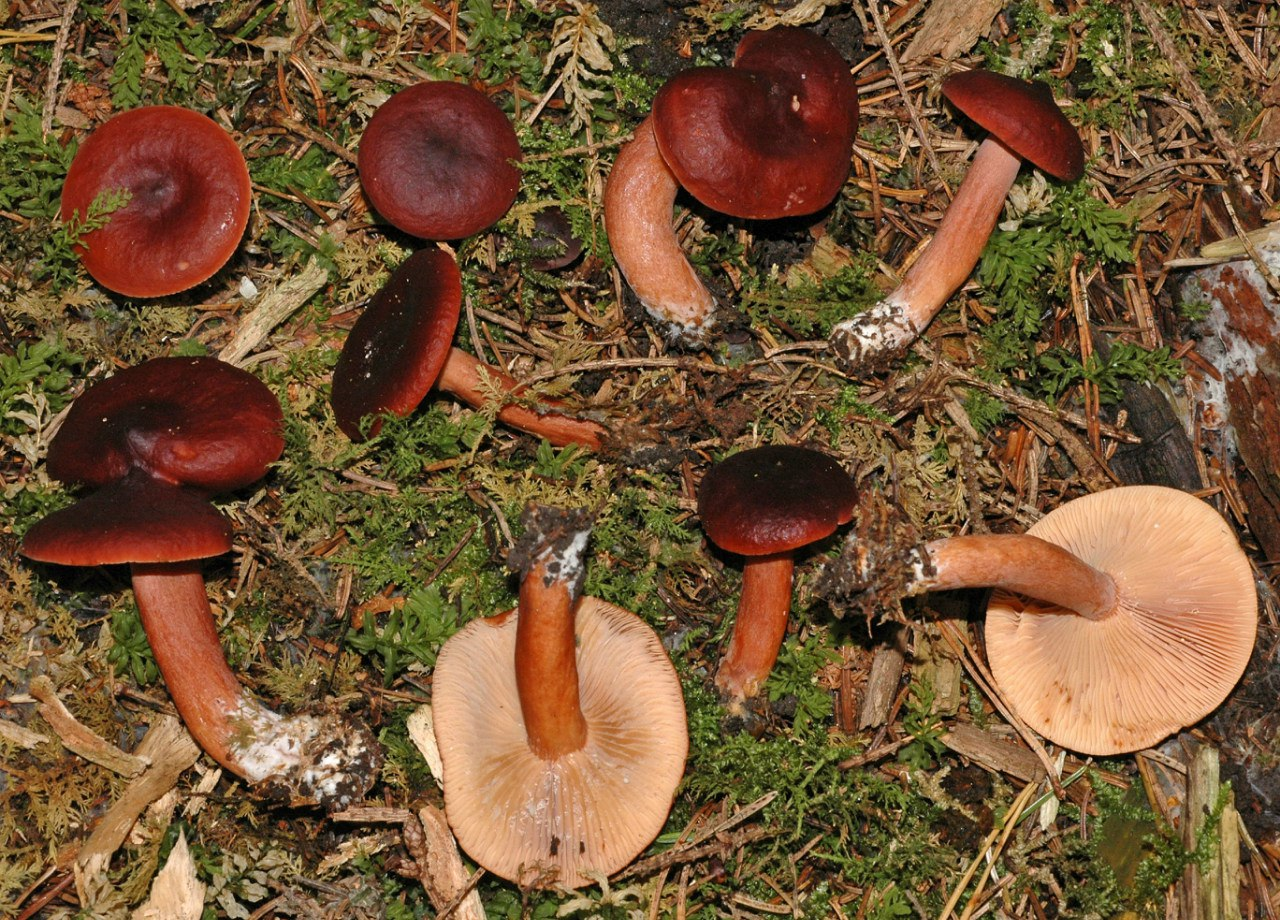

Se puede ver en el conjunto de imágenes que hay algunas fotos que tienen ciertos ángulos que no ayudan a la clasificación de las especies. Por lo que para las especies que más confunde, sería recomendable, en caso de implementar el código en una aplicación con un input por parte de un usuario; solicitarle a este una segunda imagen de la misma seta, desde otra perspectiva para volver a analizarla.

**MATRIZ DE CONFUSIÓN PARA EL SET DE VALIDACIÓN**

In [ ]:
cnn.predict(validation_dir, "Validation")

Reading test data...
Found 1310 images belonging to 9 classes.


CLASSIFICATION RESULTS (VALIDATION)

Confusion matrix

KNOWN/PREDICTED  Agaricus  Amanita  Boletus  Cortinarius  Entoloma  Hygrocybe  Lactarius  Russula  Suillus
Agaricus             44.0     12.0      0.0          2.0       0.0        0.0        7.0      5.0      1.0
Amanita               2.0    133.0      2.0          2.0       1.0        0.0        1.0      9.0      0.0
Boletus               0.0      3.0    164.0          2.0       0.0        0.0        3.0      3.0      3.0
Cortinarius           1.0      8.0      2.0        124.0       5.0        1.0       12.0      9.0      6.0
Entoloma              0.0      5.0      0.0          2.0      46.0        0.0       12.0      7.0      1.0
Hygrocybe             0.0      3.0      0.0          1.0       1.0       49.0        4.0      6.0      0.0
Lactarius             1.0      2.0      4.0         15.0       1.0        2.0      258.0     28.0      2.0
Russula               2.

Se puede observar que en la matriz de validación el error es en las mismas especies que en la matriz de entrenamiento.

**CONCLUSIÓN**

En primer lugar, se ha tratado de clasificar las imágenes mediante un modelo sencillo de Machine Learning (BoW), mediante este modelo el accuracy obtenido era muy bajo. Por este motivo, ha sido necesario implementar varios modelos preentrenados de una CNN, para todos estos se ha obtenido un accuracy bueno.   
Hemos podido apreciar como modelos que en teoría ofrecen mejores resultados, en nuestro caso, no se han adaptado tan bien como otros teóricamente peores a nuestro set de datos, como por ejemplo Xception y NasNet. El modelo seleccionado finalmente es ResNet50.

Para un futuro sería apropiado: 

*   Añadir al código un early stop, para determinar el momento óptimo en el que la red neuronal debe parar de entrenar.
*   Implementar el código en una aplicación para obtener el input de las imágenes en tiempo real.
*   Indicar al usuario el ángulo desde el cuál debería tomar las imágenes de las setas.